
<div dir=rtl >
<h1>قوانین انجمنی</h1>

قوانین انجمنی روابط و وابستگی‌های متقابل بین مجموعه بزرگی از اقلام داده‌ای را نشان می‌دهند. 

مثال متداول در رابطه با کشف قوانین انجمنی "تحلیل سبد خرید" است.  در این فرایند با توجه به اقلام مختلفی که مشتریان در سبد خریدشان قرار می‌دهند، عادات و رفتار خرید مشتریان مورد تحلیل قرار می‌گیرد و می‌توان با شناسایی ارتباط بین محصولات، الگوهای تکرار شونده در حین خرید را بدست آورد.

سه پارامتر مهم:
- Support  میزان محبوبیت یک مجموعه آیتم را با توجه به دفعات حضور در تراکنش‌ها نشان می‌دهد.
- Confidence  احتمال خرید آیتم y در صورت خرید آیتم x را نشان می‌دهد. x -> y
- Lift   ترکیب دو پارامتر بالا می‌باشد.

برای پیاده سازی قوانین انجمنی در این تمرین، از الگوریتم Apriori که یکی از محبوب‌ترین و کارآمدترین الگوریتم‌های این حوزه است استفاده می‌کنیم.


<font color='Green'> پرسش:  تاثیر مقادیر مختلف پارامتر Lift را در احتمال وقوع نتیجه بررسی کنید.  </font>


</div>




برای محاسبه پارامتر لیفت دو فرمول موجود است:

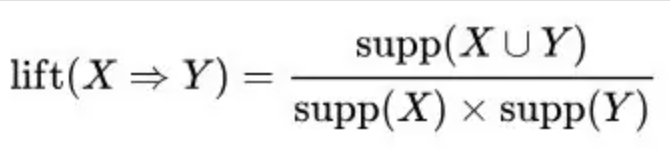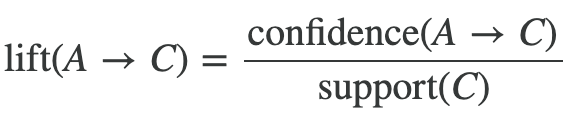

---



---




<div dir=rtl >

در فرمول اول اگر X,Y مستقل باشند صورت و مخرج یکی میشود و حاصل عبارت برابر با یک میگردد در نتیجه به نوعی در این معادله مستقل بودن مورد بررسی قرار میگیرد که تا چه میزان این دو از هم استقلال دارند.
حال میتوان گفت اگر مقدار لیفت از یک کمتر باشد یعنی احتمال اینکه هر یک از X , Y به تنهایی رخ بدهند بیشتر از این است که با هم رخ دهند در نتیجه ترکیب مناسبی نیستند.

رابطه‌ی دوم می‌گوید که اگر یک اتفاق مانند C همواره رخ بدهد نمیتوان از آن سواستفاده کرد و نتیجه خاصی گرفت یعنی اگر همیشه C رخ بدهد و حال در تعدادی از این دفعات A هم رخ بدهد نمیتوان گفت هربار A رخ داده C هم اتفاق افتاده‌است زیرا بدون توجه به A رخداد C همواره اتفاق می‌افتد در نتیجه در مخرج قرار میگیرد که به نوعی فرمول نسبت به رخداد آن نرمالایز شود و نتوان از آن سواستفاده کرد


<div dir=rtl >
<h1>الگوریتم Apriori</h1>

روش کار الگوریتم به این صورت است که یک  حداقل مقدار پشتیبانی در نظر گرفته    می‌شود و تکرارها با مجموعه آیتم‌های مکرر اتفاق می‌افتند. در صورتیکه  مجموعه‌ها و زیرمجموعه‌ها مقدار پشتیبانی کمتر از حد آستانه داشته باشند حذف می‌شوند. این روند تا زمانیکه امکان حذف وجود نداشته باشد ادامه می‌یابد. 

در این بخش از تمرین می‌خواهیم الگوریتم apriori را بر روی مجموعه داده Hypermarket_dataset که شامل سفارشات خرید افراد از فروشگاه های مواد غذایی است اعمال کنیم.


</div>





<div dir=rtl >
<h1>آماده‌سازی داده</h1>

<font color='Green'>پرسش: برای شروع کار باید داده‌های دیتاست را در قالب ماتریس پراکنده که محصولات  خریداری شده در ستون‌ و شماره سفارشات خرید به عنوان شاخص (index) هستند آماده کنید. 


برای راحتی کار محصولات خریداری شده در هر سفارش را با اعداد 0,1 کدگذاری کنید.

 نمونه ماتریس خروجی شما:

<img src="https://drive.google.com/uc?id=1eD0jan1ZbeYqSklgK--ks7oeY-MyTA3p"></img>

</div>




In [5]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
 
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [6]:
df=pd.read_csv("Hypermarket_dataset.csv")


<div dir=rtl >
<h1>شناسایی الگوهای پر تکرار</h1>

<font color='Green'> پرسش:  با اعمال الگوریتم apriori و به ازای مقدار min_support = 0.07 تمامی الگوهای پر تکرار را تولید نمایید. 

</div>




In [7]:
frequent_itemsets = apriori(df.astype(bool), min_support=0.07, use_colnames=True)
frequent_itemsets

,support,itemsets
0,1.0,(Member_number)
1,1.0,(Date)
2,1.0,(itemDescription)
3,1.0,"(Date, Member_number)"
4,1.0,"(Member_number, itemDescription)"
5,1.0,"(Date, itemDescription)"
6,1.0,"(Date, Member_number, itemDescription)"



<div dir=rtl >
<h1>استخراج قوانین انجمنی</h1>


<font color='Green'> پرسش: تابعی بنویسید که با گرفتن دو ورودی confidence و lift قوانین انجمنی حاصل را در خروجی نشان دهد. </br>
برای دو حالت خروجی خود را در گزارش ثبت کنید.


</div>




In [10]:
def association_rules_bymetric(lift, confidence):
    output_association_rules = association_rules(frequent_itemsets, metric="lift", min_threshold=lift)
    result = output_association_rules[output_association_rules.confidence > confidence]
    return result

In [11]:
association_rules_bymetric(0.2, 0.35)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Date),(Member_number),1.0,1.0,1.0,1.0,1.0,0.0,inf
1,(Member_number),(Date),1.0,1.0,1.0,1.0,1.0,0.0,inf
2,(Member_number),(itemDescription),1.0,1.0,1.0,1.0,1.0,0.0,inf
3,(itemDescription),(Member_number),1.0,1.0,1.0,1.0,1.0,0.0,inf
4,(Date),(itemDescription),1.0,1.0,1.0,1.0,1.0,0.0,inf
5,(itemDescription),(Date),1.0,1.0,1.0,1.0,1.0,0.0,inf
6,"(Date, Member_number)",(itemDescription),1.0,1.0,1.0,1.0,1.0,0.0,inf
7,"(Date, itemDescription)",(Member_number),1.0,1.0,1.0,1.0,1.0,0.0,inf
8,"(Member_number, itemDescription)",(Date),1.0,1.0,1.0,1.0,1.0,0.0,inf
9,(Date),"(Member_number, itemDescription)",1.0,1.0,1.0,1.0,1.0,0.0,inf


In [12]:

association_rules_bymetric(0.1, 0.9)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Date),(Member_number),1.0,1.0,1.0,1.0,1.0,0.0,inf
1,(Member_number),(Date),1.0,1.0,1.0,1.0,1.0,0.0,inf
2,(Member_number),(itemDescription),1.0,1.0,1.0,1.0,1.0,0.0,inf
3,(itemDescription),(Member_number),1.0,1.0,1.0,1.0,1.0,0.0,inf
4,(Date),(itemDescription),1.0,1.0,1.0,1.0,1.0,0.0,inf
5,(itemDescription),(Date),1.0,1.0,1.0,1.0,1.0,0.0,inf
6,"(Date, Member_number)",(itemDescription),1.0,1.0,1.0,1.0,1.0,0.0,inf
7,"(Date, itemDescription)",(Member_number),1.0,1.0,1.0,1.0,1.0,0.0,inf
8,"(Member_number, itemDescription)",(Date),1.0,1.0,1.0,1.0,1.0,0.0,inf
9,(Date),"(Member_number, itemDescription)",1.0,1.0,1.0,1.0,1.0,0.0,inf
